## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Data Inspection

In [2]:
train_data=pd.read_csv('TRAIN.csv')
test_data=pd.read_csv('TEST_FINAL.csv')


In [3]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
train_data.shape,test_data.shape

((188340, 10), (22265, 8))

## Check for Missing values

In [8]:
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
test_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [10]:
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [11]:
test_data.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

# Handling Data Column

In [12]:
# Converting  object dtype to datetime dtype for Date Column.

def convert(df,col):
    df[col]=pd.to_datetime(df[col])

In [13]:
convert(train_data,'Date')
convert(test_data,'Date')

In [14]:
train_data.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
dtype: object

In [15]:
test_data.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
dtype: object

In [16]:
train_data['Day']=train_data['Date'].dt.day
train_data['Month']=train_data['Date'].dt.month
train_data['Year']=train_data['Date'].dt.year

In [17]:
test_data['Day']=test_data['Date'].dt.day
test_data['Month']=test_data['Date'].dt.month
test_data['Year']=test_data['Date'].dt.year

In [18]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Month,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,1,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,1,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,1,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,1,2018


In [19]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Month,Year
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,1,6,2019
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,1,6,2019
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,1,6,2019
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,1,6,2019
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,1,6,2019


In [20]:
def drop(df,col):
    df.drop(col, axis=1, inplace=True)

In [21]:
drop(train_data,'ID')
drop(train_data,'Store_id')
drop(train_data,'Date')

In [22]:
drop(test_data,'ID')
drop(test_data,'Store_id')
drop(test_data,'Date')

In [23]:
drop(train_data,'#Order')

In [24]:
train_data.head(10)

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Day,Month,Year
0,S1,L3,R1,1,Yes,7011.84,1,1,2018
1,S4,L2,R1,1,Yes,51789.12,1,1,2018
2,S3,L2,R1,1,Yes,36868.20,1,1,2018
3,S2,L3,R1,1,Yes,19715.16,1,1,2018
4,S2,L3,R4,1,Yes,45614.52,1,1,2018
5,S1,L3,R2,1,Yes,34211.22,1,1,2018
6,S1,L1,R2,1,Yes,35352.66,1,1,2018
7,S1,L1,R3,1,Yes,52650.00,1,1,2018
8,S3,L1,R3,1,Yes,42633.78,1,1,2018
9,S4,L1,R1,1,Yes,62572.80,1,1,2018


In [25]:
test_data.head(10)

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
0,S4,L2,R3,0,No,1,6,2019
1,S1,L1,R1,0,No,1,6,2019
2,S4,L2,R1,0,No,1,6,2019
3,S1,L1,R4,0,No,1,6,2019
4,S1,L1,R2,0,No,1,6,2019
5,S4,L2,R1,0,No,1,6,2019
6,S4,L2,R3,0,No,1,6,2019
7,S1,L2,R4,0,No,1,6,2019
8,S3,L2,R4,0,No,1,6,2019
9,S2,L1,R4,0,No,1,6,2019


In [26]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='object']
cat_col_1=[col for col in test_data.columns if test_data[col].dtype=='object']


In [27]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='object']
cont_col_1=[col for col in test_data.columns if test_data[col].dtype!='object']

In [28]:
cat_col_1

['Store_Type', 'Location_Type', 'Region_Code', 'Discount']

In [29]:
train_data['Discount'].value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

# Visualising our data

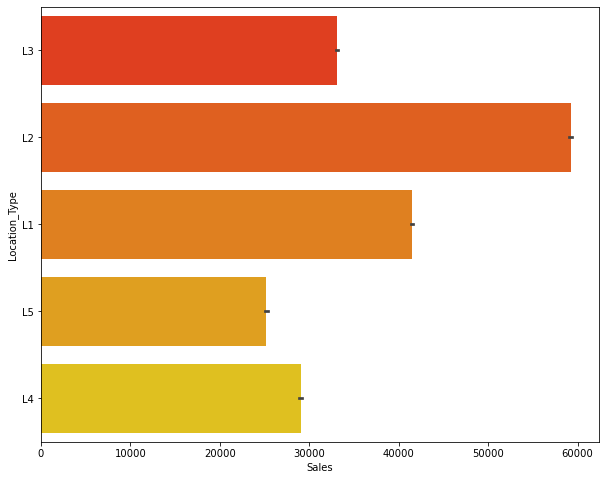

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(y='Location_Type',x='Sales',data=train_data,palette='autumn')

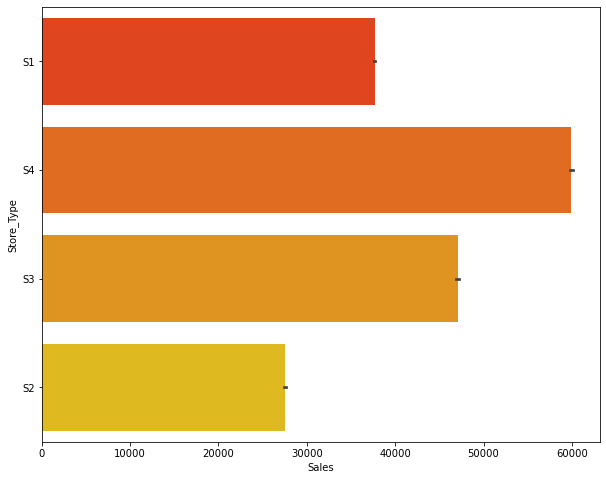

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(y='Store_Type',x='Sales',data=train_data,palette='autumn')

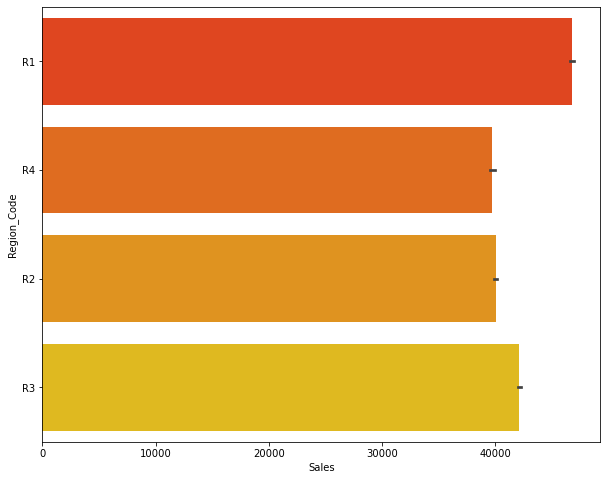

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(y='Region_Code',x='Sales',data=train_data,palette='autumn')

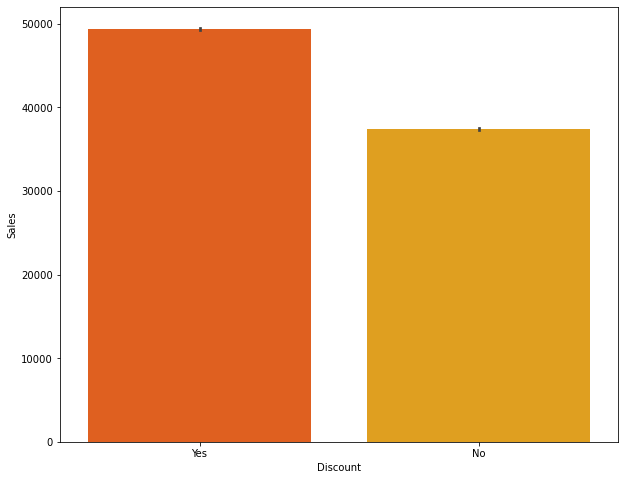

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Discount',data=train_data,palette='autumn')

1.Loacation type of L2 gives hishest sale compare to other Location types.<br>
2.Store Type of S4 gives hishest sale compare to other store types.<br>
3.WOMart stores that are present in Region R1 gives hishest sale compare to other stores.<br>
4.We see more sales if we give discount to customers.<br>

## Handling Categorical Data

In [34]:
categorical=train_data[cat_col]
categorical.head()

,Store_Type,Location_Type,Region_Code,Discount
0,S1,L3,R1,Yes
1,S4,L2,R1,Yes
2,S3,L2,R1,Yes
3,S2,L3,R1,Yes
4,S2,L3,R4,Yes


In [35]:
categorical_1=test_data[cat_col_1]
categorical_1.head()

,Store_Type,Location_Type,Region_Code,Discount
0,S4,L2,R3,No
1,S1,L1,R1,No
2,S4,L2,R1,No
3,S1,L1,R4,No
4,S1,L1,R2,No


In [36]:
Store=pd.get_dummies(categorical['Store_Type'], drop_first=True)
Location=pd.get_dummies(categorical['Location_Type'], drop_first=True)
Region=pd.get_dummies(categorical['Region_Code'], drop_first=True)


In [37]:
Store_1=pd.get_dummies(categorical_1['Store_Type'], drop_first=True)
Location_1=pd.get_dummies(categorical_1['Location_Type'], drop_first=True)
Region_1=pd.get_dummies(categorical_1['Region_Code'], drop_first=True)

In [38]:
Store.head()

,S2,S3,S4
0,0,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [39]:
Store_1.head()

,S2,S3,S4
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [40]:
categorical['Discount'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
dic={'Yes':1, 'No':0}

In [42]:
categorical['Discount']=categorical['Discount'].map(dic)

In [43]:
categorical_1['Discount']=categorical_1['Discount'].map(dic)

In [44]:
categorical.head()

,Store_Type,Location_Type,Region_Code,Discount
0,S1,L3,R1,1
1,S4,L2,R1,1
2,S3,L2,R1,1
3,S2,L3,R1,1
4,S2,L3,R4,1


In [45]:
# Concatenate dataframes
data_train=pd.concat([categorical,Store,Location,Region,train_data[cont_col]],axis=1)
data_test=pd.concat([categorical_1,Store_1,Location_1,Region_1,test_data[cont_col_1]],axis=1)

In [46]:
data_train.head(10)

,Store_Type,Location_Type,Region_Code,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Sales,Day,Month,Year
0,S1,L3,R1,1,0,0,0,0,1,0,0,0,0,0,1,7011.84,1,1,2018
1,S4,L2,R1,1,0,0,1,1,0,0,0,0,0,0,1,51789.12,1,1,2018
2,S3,L2,R1,1,0,1,0,1,0,0,0,0,0,0,1,36868.20,1,1,2018
3,S2,L3,R1,1,1,0,0,0,1,0,0,0,0,0,1,19715.16,1,1,2018
4,S2,L3,R4,1,1,0,0,0,1,0,0,0,0,1,1,45614.52,1,1,2018
5,S1,L3,R2,1,0,0,0,0,1,0,0,1,0,0,1,34211.22,1,1,2018
6,S1,L1,R2,1,0,0,0,0,0,0,0,1,0,0,1,35352.66,1,1,2018
7,S1,L1,R3,1,0,0,0,0,0,0,0,0,1,0,1,52650.00,1,1,2018
8,S3,L1,R3,1,0,1,0,0,0,0,0,0,1,0,1,42633.78,1,1,2018
9,S4,L1,R1,1,0,0,1,0,0,0,0,0,0,0,1,62572.80,1,1,2018


In [47]:
data_test.head(10)

,Store_Type,Location_Type,Region_Code,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,S4,L2,R3,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
1,S1,L1,R1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,2019
2,S4,L2,R1,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
3,S1,L1,R4,0,0,0,0,0,0,0,0,0,0,1,0,1,6,2019
4,S1,L1,R2,0,0,0,0,0,0,0,0,1,0,0,0,1,6,2019
5,S4,L2,R1,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
6,S4,L2,R3,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
7,S1,L2,R4,0,0,0,0,1,0,0,0,0,0,1,0,1,6,2019
8,S3,L2,R4,0,0,1,0,1,0,0,0,0,0,1,0,1,6,2019
9,S2,L1,R4,0,1,0,0,0,0,0,0,0,0,1,0,1,6,2019


In [48]:
drop(data_train,'Store_Type')
drop(data_train,'Location_Type')
drop(data_train,'Region_Code')

In [49]:
drop(data_test,'Store_Type')
drop(data_test,'Location_Type')
drop(data_test,'Region_Code')

In [50]:
data_train.head(10)

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Sales,Day,Month,Year
0,1,0,0,0,0,1,0,0,0,0,0,1,7011.84,1,1,2018
1,1,0,0,1,1,0,0,0,0,0,0,1,51789.12,1,1,2018
2,1,0,1,0,1,0,0,0,0,0,0,1,36868.20,1,1,2018
3,1,1,0,0,0,1,0,0,0,0,0,1,19715.16,1,1,2018
4,1,1,0,0,0,1,0,0,0,0,1,1,45614.52,1,1,2018
5,1,0,0,0,0,1,0,0,1,0,0,1,34211.22,1,1,2018
6,1,0,0,0,0,0,0,0,1,0,0,1,35352.66,1,1,2018
7,1,0,0,0,0,0,0,0,0,1,0,1,52650.00,1,1,2018
8,1,0,1,0,0,0,0,0,0,1,0,1,42633.78,1,1,2018
9,1,0,0,1,0,0,0,0,0,0,0,1,62572.80,1,1,2018


In [51]:
data_test.head(10)

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,2019
2,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
3,0,0,0,0,0,0,0,0,0,0,1,0,1,6,2019
4,0,0,0,0,0,0,0,0,1,0,0,0,1,6,2019
5,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
6,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
7,0,0,0,0,1,0,0,0,0,0,1,0,1,6,2019
8,0,0,1,0,1,0,0,0,0,0,1,0,1,6,2019
9,0,1,0,0,0,0,0,0,0,0,1,0,1,6,2019


In [52]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

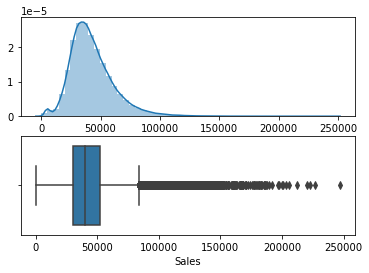

In [53]:
plt.figure(figsize=(30,20))
plot(data_train,'Sales')

In [54]:
data_train['Sales']=np.where(data_train['Sales']>=200000,data_train['Sales'].median(),data_train['Sales'])

<Figure size 2160x1440 with 0 Axes>

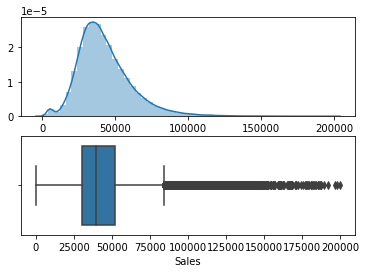

In [55]:
plt.figure(figsize=(30,20))
plot(data_train,'Sales')

## Separate  Independent & Dependent Data

In [56]:
X=data_train.drop('Sales',axis=1)
X.head()

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,2018
1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,2018
2,1,0,1,0,1,0,0,0,0,0,0,1,1,1,2018
3,1,1,0,0,0,1,0,0,0,0,0,1,1,1,2018
4,1,1,0,0,0,1,0,0,0,0,1,1,1,1,2018


In [57]:
y=data_train['Sales']
y

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
from sklearn.metrics import mean_squared_log_error

### Function that is been used to test various regression models like Linear Regression, Decision Tree Regression,Random Forest Regression.

In [61]:


from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MSLE',mean_squared_log_error(y_test, y_prediction, multioutput='raw_values'))
    

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Linear Regressor

In [65]:
predict(LinearRegression())

Training score : 0.5504357480018848
predictions are: 
 [58571.1123736  26345.11405058 32686.45248466 ... 31144.07851107
 41081.69902815 34533.68005342]


r2 score: 0.5526455646999608
MAE: 8589.289816184773
MSE: 151229995.74600378
RMSE: 12297.56056077805
MSLE [0.11165309]


## Decision Tree Regressor

In [66]:
predict(DecisionTreeRegressor())

Training score : 0.7955687379783594
predictions are: 
 [56608.5        26868.         25118.10857143 ... 31416.
 33918.         30920.57142857]


r2 score: 0.6922427975783513
MAE: 6919.317594710746
MSE: 104038580.46430749
RMSE: 10199.930414679675
MSLE [0.06391185]


## Random Forest Regressor

In [67]:
predict(RandomForestRegressor())

Training score : 0.7927653493840292
predictions are: 
 [56926.35320618 26201.2485     25009.75917492 ... 32644.22525
 34378.771      30937.78909125]


r2 score: 0.709403082974152
MAE: 6731.100988438833
MSE: 98237475.8308716
RMSE: 9911.482019903562
MSLE [0.05736587]


### Random Forest Regressor had performed comparatively better than rest of our models, so we will proceed with it.

In [68]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
print('Training score : {}'.format(reg.score(X_train,y_train)))
y_prediction=reg.predict(X_test)
print('predictions are: \n {}'.format(y_prediction))
print('\n')
r2_score=metrics.r2_score(y_test,y_prediction)
print('r2 score: {}'.format(r2_score))
print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
print('MSLE',mean_squared_log_error(y_test, y_prediction, multioutput='raw_values'))

Training score : 0.7927665696462927
predictions are: 
 [57132.83063047 25122.8685     25004.25869634 ... 32764.50603571
 34378.159      30906.26376321]


r2 score: 0.7095617551092743
MAE: 6729.523074533219
MSE: 98183836.06690352
RMSE: 9908.77570978895
MSLE [0.05737201]


In [73]:
submission = pd.read_csv('SAMPLE.csv')
submission.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [74]:
final_predictions = reg.predict(data_test)

In [75]:
final_predictions

array([ 90085.14996429,  62130.50721429, 115832.58748094, ...,
        49555.27964177,  29870.36415394,  26923.034     ])

In [76]:
submission['Sales'] = final_predictions

In [77]:
submission.head()

,ID,Sales
0,T1188341,90085.149964
1,T1188342,62130.507214
2,T1188343,115832.587481
3,T1188344,58257.553089
4,T1188345,49548.796214


In [ ]:
submission.to_csv('my_first_submission.csv', index=False)